In [98]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data loading and analysis

In [80]:
data = pd.read_csv("../../data/clothes_price_data.csv")

In [81]:
data.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [83]:
data.describe()

,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


## Data distribution

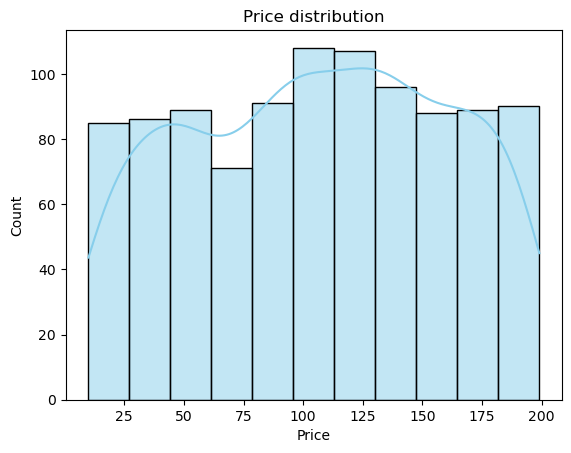

In [84]:
sns.histplot(data['Price'], kde=True, color='skyblue')
plt.title("Price distribution")
plt.show()

/var/folders/w6/w892rr_s6zz9y904lqfjtzd00000gn/T/ipykernel_6195/4004248255.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', palette='pastel')


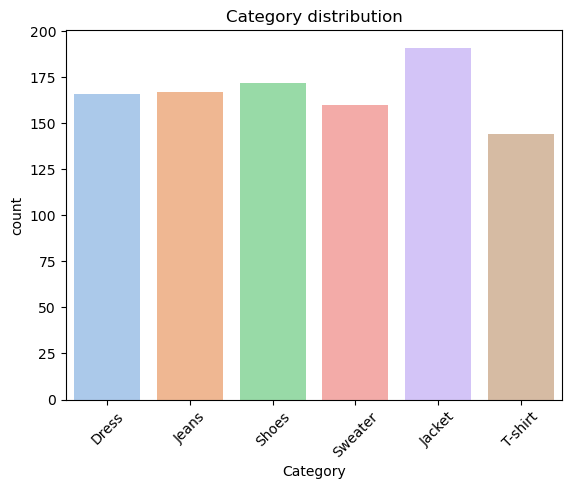

In [85]:
sns.countplot(data=data, x='Category', palette='pastel')
plt.xticks(rotation=45)
plt.title("Category distribution")
plt.show()

# Data preprocessing

In [86]:
print(f"Duplicate values : {data.duplicated().sum()}")
print(f"Missing values : {data.isnull().sum().sum()}")

Duplicate values : 0
Missing values : 0


In [87]:
data_encoded = pd.get_dummies(data, columns=["Brand", "Category", "Color", "Size", "Material"])

X = data_encoded.drop("Price", axis=1)
y = data_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Search for the best model

In [88]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}

best_model = None
best_score = float('inf')

In [93]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics in the results dictionary
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

In [97]:
best_model_name_rmse = min(results, key=lambda x: results[x]["RMSE"])
best_model_rmse = models[best_model_name_rmse]
print(results)
print(f"Best model by RMSE: {best_model_name_rmse}")
print(f"Best model RMSE: {results[best_model_name_rmse]['RMSE']}")

{'Linear Regression': {'MAE': 46.83434961031129, 'MSE': 2984.1390089431843, 'RMSE': 54.62727348992611, 'R2 Score': -0.018304478645503774}, 'Decision Tree': {'MAE': 62.63, 'MSE': 5965.04, 'RMSE': 77.23367141344505, 'R2 Score': -1.0355040194493919}, 'Random Forest': {'MAE': 47.07772178571428, 'MSE': 3180.7208821475133, 'RMSE': 56.39788012104279, 'R2 Score': -0.08538587173897882}, 'Gradient Boosting': {'MAE': 47.02597991539126, 'MSE': 3028.7859062564794, 'RMSE': 55.034406567678, 'R2 Score': -0.03353973925350573}}
Best model by RMSE: Linear Regression
Best model RMSE: 54.62727348992611


# Save the model

In [99]:
joblib.dump(best_model_rmse, "../../models/clothes/model.joblib")

['../../models/clothes/model.joblib']